In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import train
import network_unet as unet
import network_hed as hed
import torch

#reimport
import evaluation as eval
import importlib
importlib.reload(eval)

import utils

# DATA

In [3]:
# Test data
target_pos = 4

test_file = '../data/SIVE/test/'
test_paths = glob.glob(test_file + '*.npy')
test_targets = [np.load(file)[target_pos] for file in test_paths]
test_input = [np.load(file)[0:target_pos] for file in test_paths]

print("Test dimensions:")
print(np.shape(test_targets))
print(np.shape(test_input))

Test dimensions:
(196, 144, 144)
(196, 4, 144, 144)


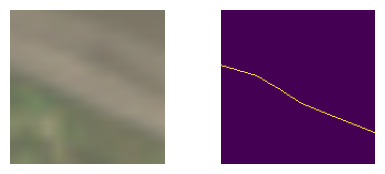

In [3]:
i = np.random.randint(0,len(test_paths))
rgb = utils.get_rgb(test_input[i],contrast=0.4)
target = test_targets[i]

fig, ax = plt.subplots(1,2,figsize=(5,2))
ax[0].imshow(rgb)
ax[1].imshow(target)

for a in ax:
    a.axis('off')

# HED ImageNet

Using device: mps


Side channels: [16, 24, 80, 112, 320]
196


/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/src/evaluation.py:164: RuntimeWarning: invalid value encountered in scalar divide
  recall = TP_ / (TP_ + FN_)
/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/src/evaluation.py:165: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * recall) / (precision + recall)
/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/src/evaluation.py:163: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP_ / (TP_ + FP_)


accuracy: 91.079
precision: 5.7618
recall: 92.5089
f1: 10.8272
iou: nan
fom: 44.8264


/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/SICS/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/conorosullivan/Documents/git/COASTAL_MONITORING/sentinel2-irish-coastal-segmentation/SICS/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


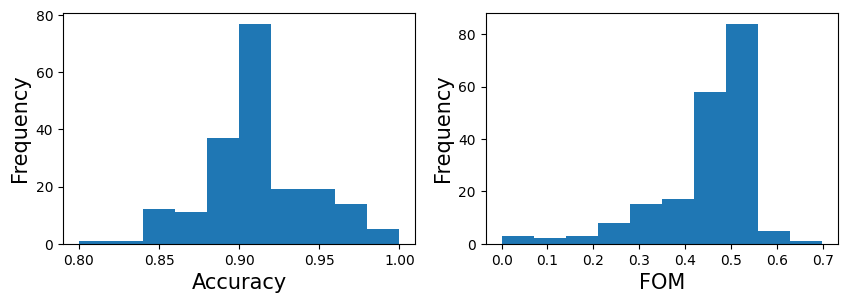

In [65]:
model_name = "SIVE_13MAR2025_HED_ImageNet_True_wBCE.pth"
device = torch.device('mps')  #UPDATE
print("Using device: {}\n".format(device))

backbone = hed.EfficientNetBackbone(in_channels=4)
model = hed.HED(backbone=backbone, out_channels=1)

state_dict = torch.load(f'../models/{model_name}', map_location=torch.device('cpu') )
model.load_state_dict(state_dict)
model.eval()
model.to(device)

targets, test_preds = eval.get_preds(model,test_paths,batch_size=10)
print(len(test_preds))

test_metrics, test_arr = eval.eval_metrics(test_targets, test_preds)
eval.display_metrics(test_metrics, test_arr)

[0. 1.]


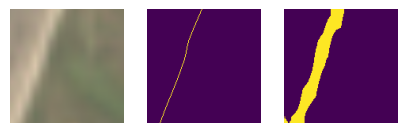

In [64]:
i = np.random.randint(0,len(test_paths))
rgb = utils.get_rgb(test_input[i],contrast=0.4)
target = test_targets[i]

pred = test_preds[i]
print(np.unique(pred))

fig, ax = plt.subplots(1,3,figsize=(5,2))
ax[0].imshow(rgb)
ax[1].imshow(target)
ax[2].imshow(pred)

for a in ax:
    a.axis('off')

# HED

Using device: mps

196
accuracy: 88.0097
precision: 4.6612
recall: 97.5202
f1: 8.8723
iou: nan
fom: 38.0964


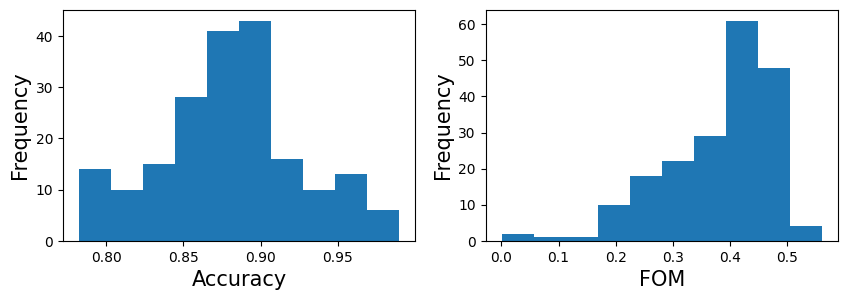

In [102]:
model_name = "SIVE_01MAR2025_HED_wBCE.pth"
device = torch.device('mps')  #UPDATE
print("Using device: {}\n".format(device))

backbone = hed.SimpleCNNBackbone(in_channels=4)
model = hed.HED(backbone=backbone, out_channels=1)

state_dict = torch.load(f'../models/{model_name}', map_location=torch.device('cpu') )
model.load_state_dict(state_dict)
model.eval()
model.to(device)

targets, test_preds = eval.get_preds(model,test_paths,batch_size=10)
print(len(test_preds))

test_metrics, test_arr = eval.eval_metrics(test_targets, test_preds)
eval.display_metrics(test_metrics, test_arr)

[0.]


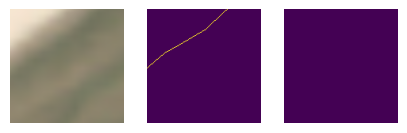

In [94]:
i = np.random.randint(0,len(test_paths))
rgb = utils.get_rgb(test_input[i],contrast=0.4)
target = test_targets[i]

pred = test_preds[i]
print(np.unique(pred))

fig, ax = plt.subplots(1,3,figsize=(5,2))
ax[0].imshow(rgb)
ax[1].imshow(target)
ax[2].imshow(pred)

for a in ax:
    a.axis('off')

# UNET

In [105]:
model_name = "SIVE_30APR2025_UNET_DICE.pth"
device = torch.device('mps')  #UPDATE
print("Using device: {}\n".format(device))

model = unet.U_Net(4, 1)

state_dict = torch.load(f'../models/{model_name}', map_location=torch.device('cpu') )
model.load_state_dict(state_dict)
model.eval()
model.to(device)

Using device: mps



U_Net(
  (Maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv1): conv_block(
    (conv): Sequential(
      (0): Conv2d(4, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (Conv2): conv_block(
    (conv): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )

In [106]:
targets, test_preds = eval.get_preds(model,test_paths,batch_size=10)
print(len(test_preds))

196


[0.]


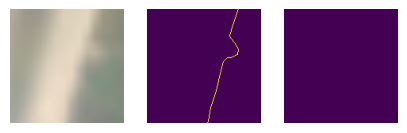

In [155]:
i = np.random.randint(0,len(test_paths))
rgb = utils.get_rgb(test_input[i],contrast=0.4)
target = test_targets[i]

pred = test_preds[i]
print(np.unique(pred))

fig, ax = plt.subplots(1,3,figsize=(5,2))
ax[0].imshow(rgb)
ax[1].imshow(target)
ax[2].imshow(pred)

for a in ax:
    a.axis('off')

accuracy: 98.5036
precision: 14.3917
recall: 40.3662
f1: 20.2995
iou: nan
fom: 63.5915


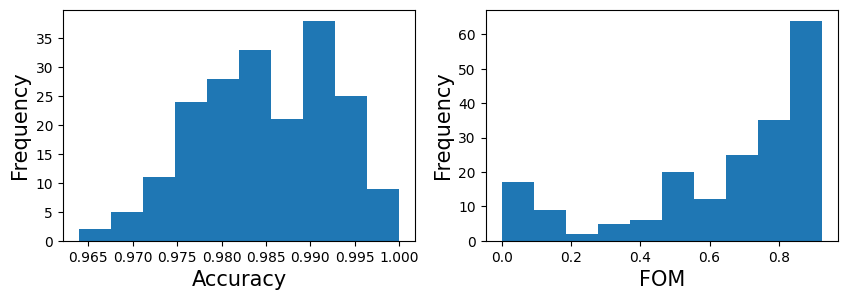

In [158]:
importlib.reload(eval)
test_metrics, test_arr = eval.eval_metrics(test_targets, test_preds)
eval.display_metrics(test_metrics, test_arr)